In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [24]:
import enum

# Coll names
class CollNames(enum.Enum):
    RARE = 'Rare'
    VERY_RARE = 'Very Rare'
    ULTRA_RARE = 'Ultra Rare'

In [25]:
filename = 'probabilities.csv'

df = pd.read_csv(filename)

df.set_index('Treasures Opened', inplace=True)

<AxesSubplot: xlabel='Treasures Opened'>

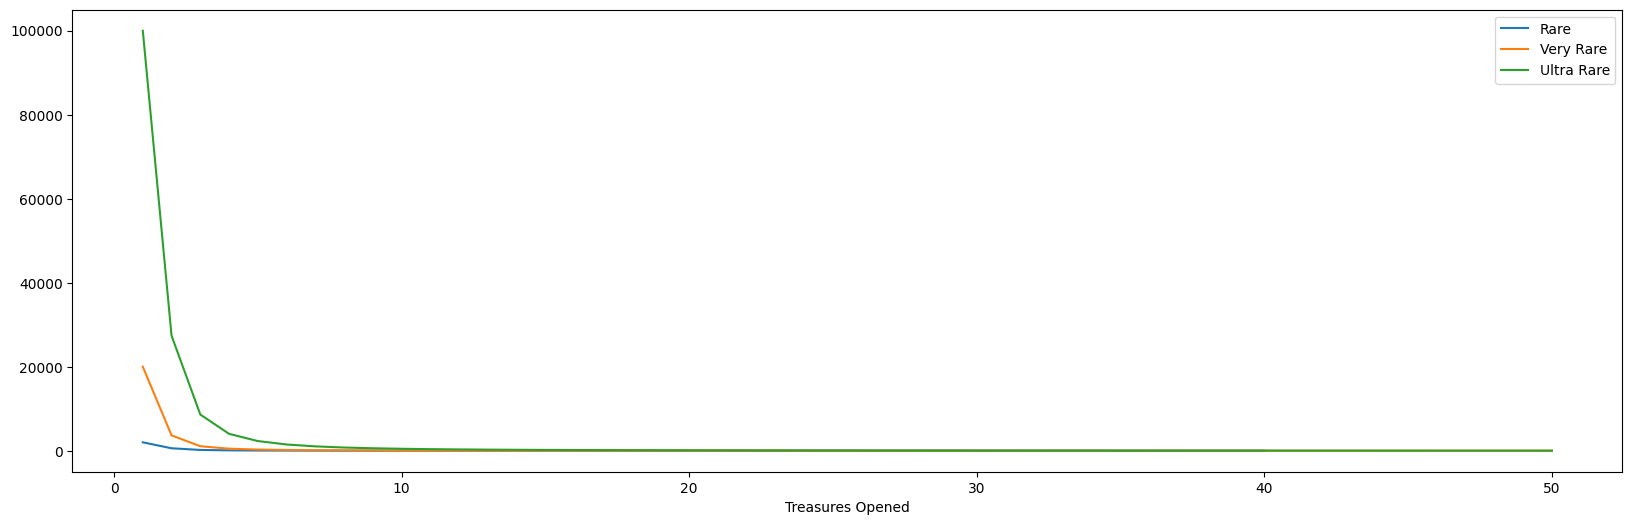

In [26]:
df.plot(figsize=(20, 6))

In [27]:
# add to each probability the 1/probability 

for col in df.columns:
    df[f'1/{col}'] = 1/df[col]

df

,Rare,Very Rare,Ultra Rare,1/Rare,1/Very Rare,1/Ultra Rare
Treasures Opened,,,,,,
1,2000.0,20000.0,100000,0.000500,0.000050,0.000010
2,583.0,3653.0,27380,0.001715,0.000274,0.000037
3,187.0,1069.0,8614,0.005348,0.000935,0.000116
4,88.0,485.0,4021,0.011364,0.002062,0.000249
5,51.0,276.0,2303,0.019608,0.003623,0.000434
6,33.0,178.0,1486,0.030303,0.005618,0.000673
7,23.0,124.0,1037,0.043478,0.008065,0.000964
8,17.0,92.0,764,0.058824,0.010870,0.001309
9,13.1,70.0,586,0.076336,0.014286,0.001706


In [28]:
def get_probabilities(df):
    return df[[col for col in df.columns if '1/' in col]]

In [29]:
def get_inverse_probabilities(df):
    return df[[col for col in df.columns if '1/' not in col]]

<AxesSubplot: xlabel='Treasures Opened'>

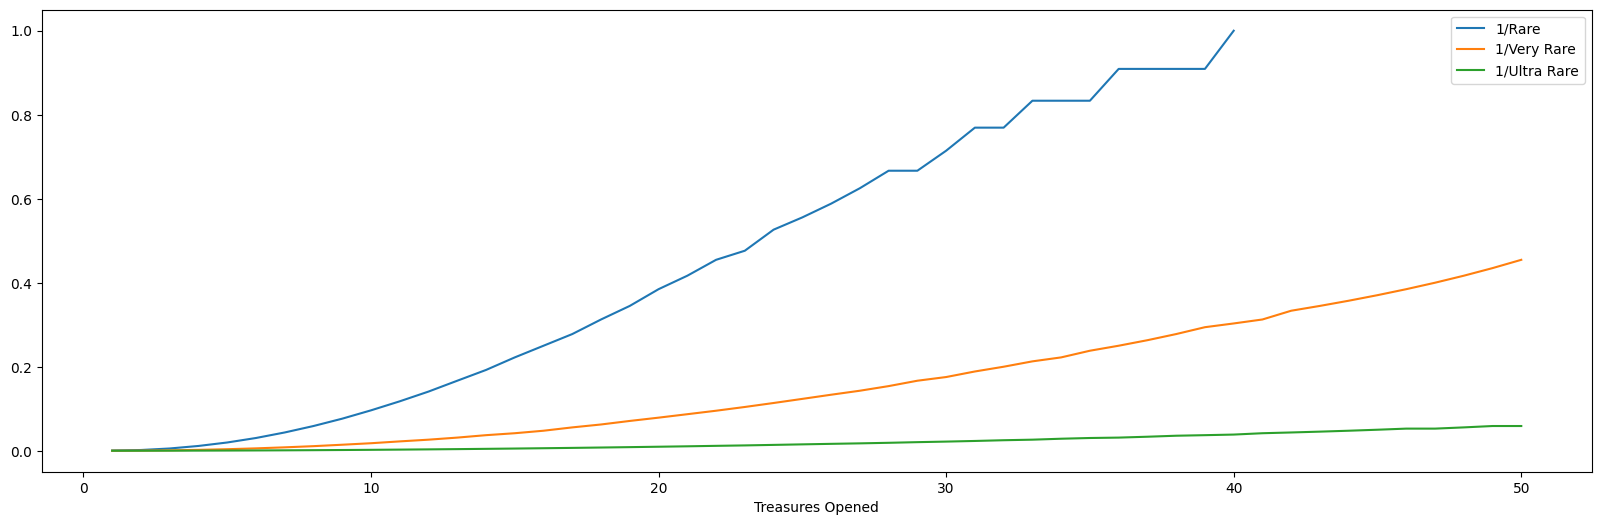

In [30]:
# plot only for 1/probability

get_probabilities(df).plot(figsize=(20, 6))

In [31]:
# normalize the probabilities

def min_max_normalize(df):
    return (df - df.min()) / (df.max() - df.min())

def z_score_normalize(df):
    return (df - df.mean()) / df.std()

df_norm = min_max_normalize(df)

In [32]:
df_norm

,Rare,Very Rare,Ultra Rare,1/Rare,1/Very Rare,1/Ultra Rare
Treasures Opened,,,,,,
1,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
2,0.291146,0.182560,0.273677,0.001216,0.000492,0.000451
3,0.093047,0.053346,0.085985,0.004850,0.001948,0.001804
4,0.043522,0.024143,0.040047,0.010869,0.004427,0.004058
5,0.025013,0.013692,0.022864,0.019117,0.007862,0.007213
6,0.016008,0.008791,0.014692,0.029818,0.012251,0.011272
7,0.011006,0.006091,0.010202,0.043000,0.017634,0.016226
8,0.008004,0.004490,0.007471,0.058353,0.023806,0.022085
9,0.006053,0.003390,0.005691,0.075874,0.031322,0.028845


<AxesSubplot: xlabel='Treasures Opened'>

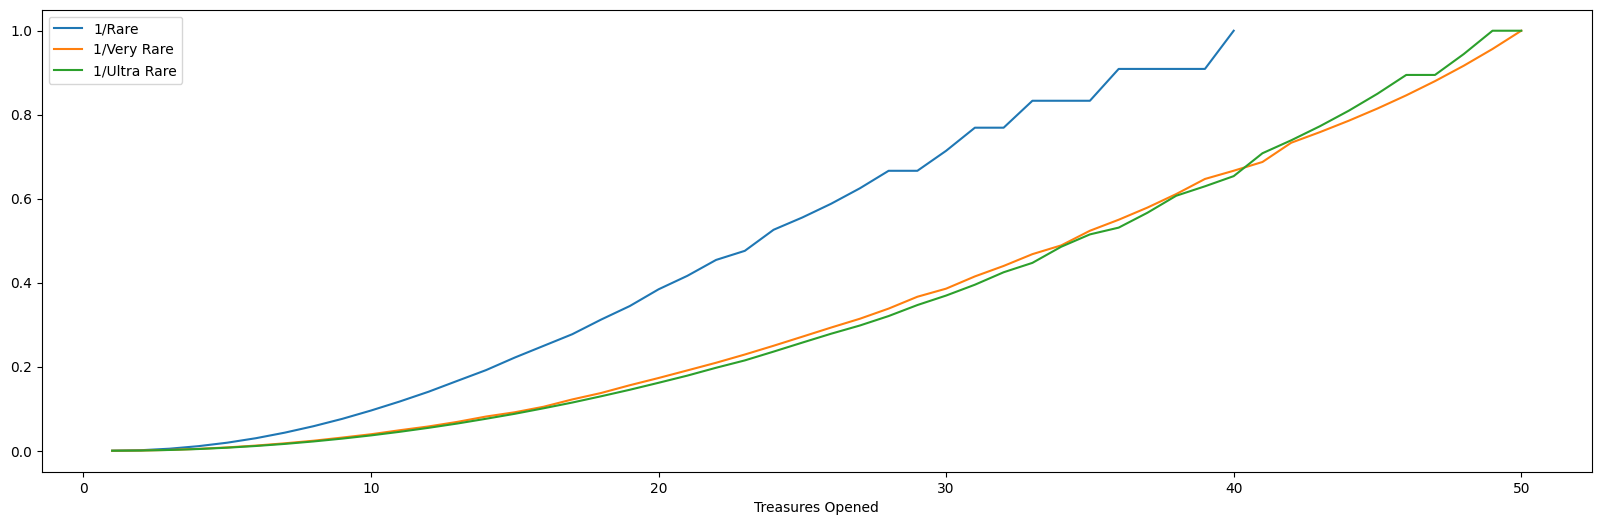

In [33]:
get_probabilities(df_norm).plot(figsize=(20, 6))

<AxesSubplot: xlabel='Treasures Opened'>

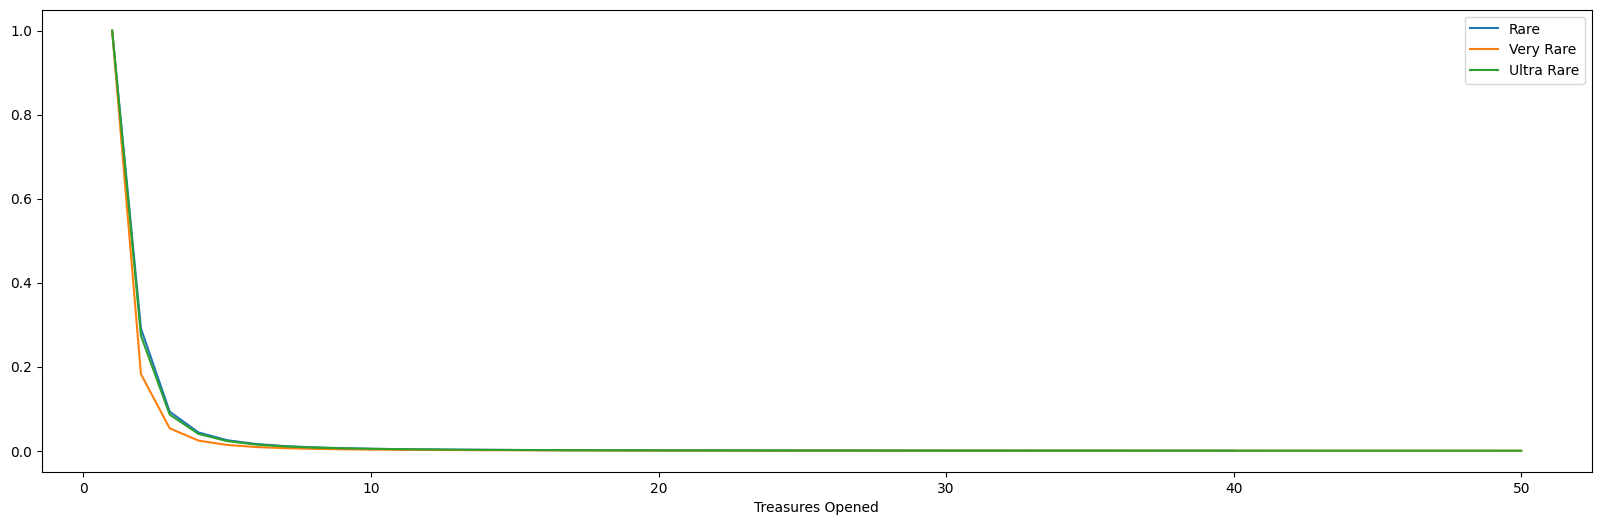

In [34]:
get_inverse_probabilities(df_norm).plot(figsize=(20, 6))

<AxesSubplot: xlabel='Treasures Opened'>

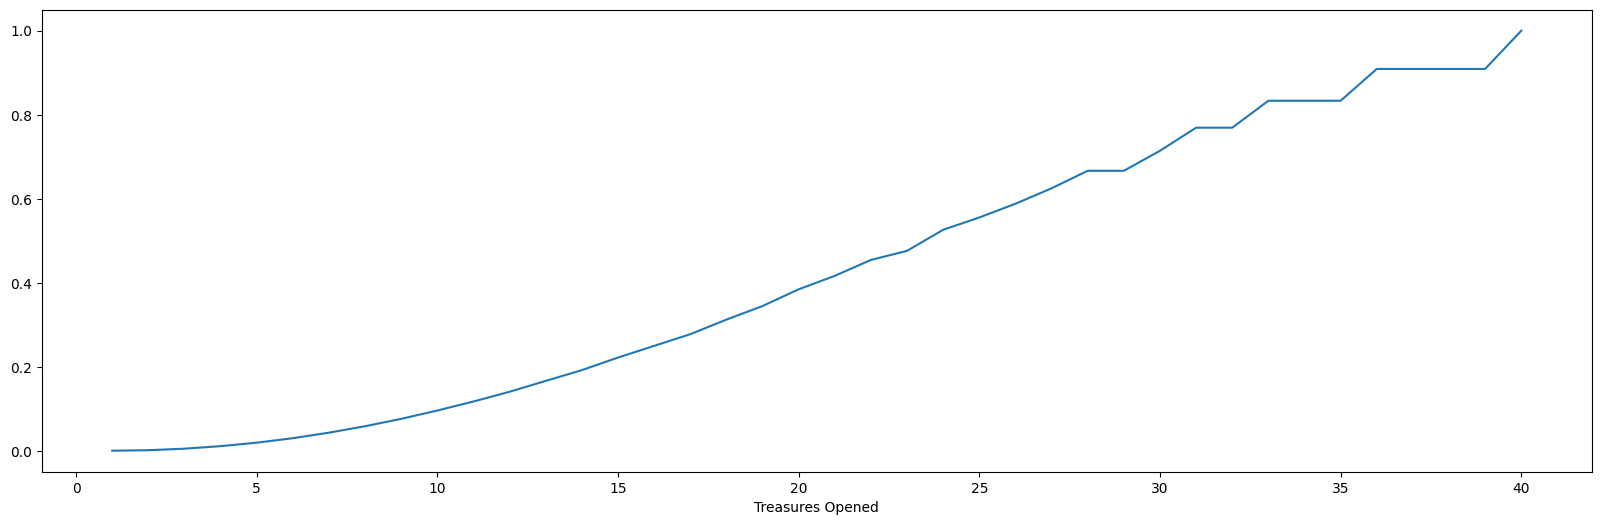

In [35]:
df[f'1/{CollNames.RARE.value}'].plot(figsize=(20, 6))

In [36]:
def increasing_chance_random(*, attempt, base_prob, max_attempts: int|None):
    # sourcery skip: assign-if-exp, reintroduce-else
    if max_attempts:
        return base_prob + (attempt / max_attempts)**2

    return base_prob

In [37]:
np.set_printoptions(suppress=True)
 
attempts = 40
base_prob = 1/2000

# for i in range(attempts):
#     print(f'Attempt {i+1}: {1/round(increasing_chance_random(attempt=i, base_prob=base_prob, max_attempts=attempts), 5)}')

rare_i = [round(1/increasing_chance_random(attempt=i, base_prob=1/2000, max_attempts=39), 2) for i in range(40)] + [None for i in range(10)]
very_rare_i = [round(1/increasing_chance_random(attempt=i, base_prob=1/20000, max_attempts=73), 2) for i in range(50)]
ultra_rare_i = [round(1/increasing_chance_random(attempt=i, base_prob=1/200000, max_attempts=202), 2) for i in range(50)]

n_df = pd.DataFrame(
    {
        CollNames.RARE.value: df[CollNames.RARE.value].values,
        f'{CollNames.RARE.value}I': rare_i,
        CollNames.VERY_RARE.value: df[CollNames.VERY_RARE.value].values,
        f'{CollNames.VERY_RARE.value}I': very_rare_i,
        CollNames.ULTRA_RARE.value: df[CollNames.ULTRA_RARE.value].values,
        f'{CollNames.ULTRA_RARE.value}I': ultra_rare_i,
    }
)

n_df = n_df.set_index(df.index)

no_df = min_max_normalize(n_df)

n_df.describe()

,Rare,RareI,Very Rare,Very RareI,Ultra Rare,Ultra RareI
count,40.000000,40.000000,50.000000,50.000000,50.00000,50.000000
mean,77.070000,93.103250,528.008000,548.525600,2997.70000,5174.484200
std,326.210016,341.272152,2860.464612,2874.091915,14569.32823,28548.500626
min,1.000000,1.000000,2.200000,2.220000,17.00000,16.990000
25%,1.375000,1.780000,3.650000,3.945000,28.50000,30.220000
50%,2.500000,4.000000,7.800000,8.885000,63.50000,68.045000
75%,8.975000,15.975000,30.750000,35.575000,252.25000,272.507500
max,2000.000000,2000.000000,20000.000000,20000.000000,100000.00000,200000.000000


/var/folders/8g/g7kwx2qj59j6626nwywcf23r0000gn/T/ipykernel_57952/1646948988.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ultra_rare_df[CollNames.ULTRA_RARE.value] = 1/ultra_rare_df[CollNames.ULTRA_RARE.value]
/var/folders/8g/g7kwx2qj59j6626nwywcf23r0000gn/T/ipykernel_57952/1646948988.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ultra_rare_df[f'{CollNames.ULTRA_RARE.value}I'] = 1/ultra_rare_df[f'{CollNames.ULTRA_RARE.value}I']


<AxesSubplot: xlabel='Treasures Opened'>

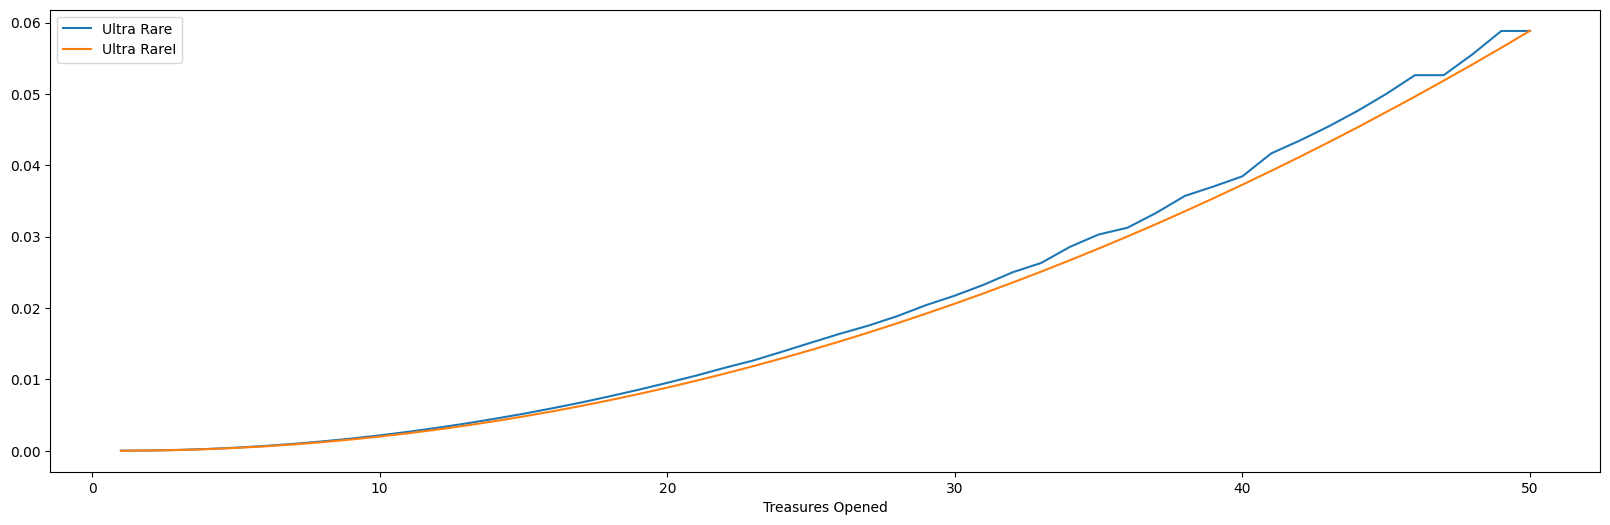

In [38]:
rare_df = n_df[[CollNames.RARE.value, f'{CollNames.RARE.value}I']]

very_rare_df = n_df[[CollNames.VERY_RARE.value, f'{CollNames.VERY_RARE.value}I']]
ultra_rare_df = n_df[[CollNames.ULTRA_RARE.value, f'{CollNames.ULTRA_RARE.value}I']]

ultra_rare_df[CollNames.ULTRA_RARE.value] = 1/ultra_rare_df[CollNames.ULTRA_RARE.value]
ultra_rare_df[f'{CollNames.ULTRA_RARE.value}I'] = 1/ultra_rare_df[f'{CollNames.ULTRA_RARE.value}I']

ultra_rare_df.plot(figsize=(20, 6))

In [39]:
class DropChances:
    def __init__(
        self,
        name: str,
        base_prob: float,
        max_attempts: int | None = None,
    ) -> None:
        self.name = name
        self.base_prob = base_prob
        self.max_attempts = max_attempts
        self.attempts = 0

    def make_attempt(self) -> float:
        chance = increasing_chance_random(
            attempt=self.attempts,
            base_prob=self.base_prob,
            max_attempts=self.max_attempts,
        )
        self.attempts += 1

        return chance
    
    def reset_attempts(self):
        self.attempts = 0

In [40]:
steel_sword: DropChances = DropChances(
    name='Steel Sword',
    base_prob=1/5,
)
silver_sword: DropChances = DropChances(
    name='Silver Sword',
    base_prob=1/10,
    max_attempts=10,
)

In [41]:
class Zombie:
    def __init__(self, name: str, drop_chances: list[DropChances]) -> None:
        self.name = name
        self.drop_chances = drop_chances

    def make_attempt(self) -> None:
        for drop_chance in self.drop_chances:
            value = np.random.random()
            chance = drop_chance.make_attempt()
            print(f'{value=}, {chance=}')
            if value < chance:
                drop_chance.reset_attempts()
                print(f'{self.name} dropped {drop_chance.name}')

In [42]:
zombie = Zombie(
    name='Zombie',
    drop_chances=[silver_sword],
)

for number in range(20):
    print(f'Killing zombie {number+1}')
    zombie.make_attempt()

Killing zombie 1
value=0.5288231204396877, chance=0.1
Killing zombie 2
value=0.5700044663715309, chance=0.11000000000000001
Killing zombie 3
value=0.9096487103500738, chance=0.14
Killing zombie 4
value=0.10360250844546837, chance=0.19
Zombie dropped Silver Sword
Killing zombie 5
value=0.15391252475792383, chance=0.1
Killing zombie 6
value=0.09311173856167654, chance=0.11000000000000001
Zombie dropped Silver Sword
Killing zombie 7
value=0.3166828571722272, chance=0.1
Killing zombie 8
value=0.20236139197956549, chance=0.11000000000000001
Killing zombie 9
value=0.4446552046549216, chance=0.14
Killing zombie 10
value=0.9747627722301763, chance=0.19
Killing zombie 11
value=0.9898147542721787, chance=0.26
Killing zombie 12
value=0.6764676025309497, chance=0.35
Killing zombie 13
value=0.8743158118022881, chance=0.45999999999999996
Killing zombie 14
value=0.14833895005179698, chance=0.59
Zombie dropped Silver Sword
Killing zombie 15
value=0.7632078698237502, chance=0.1
Killing zombie 16
value=

In [43]:
steel_sword_array = np.array(
    [steel_sword.make_attempt() for _ in range(100)]
).round(2)
silver_sword_array = np.array(
    [silver_sword.make_attempt() for _ in range(100)]
).round(2)

droplist = pd.DataFrame(
    {
        steel_sword.name: steel_sword_array * 100,
        silver_sword.name: silver_sword_array * 100,
    }
)

droplist.head(20)

,Steel Sword,Silver Sword
0,20.0,10.0
1,20.0,11.0
2,20.0,14.0
3,20.0,19.0
4,20.0,26.0
5,20.0,35.0
6,20.0,46.0
7,20.0,59.0
8,20.0,74.0
9,20.0,91.0
